In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import keras
from PIL import Image, ImageOps

Using TensorFlow backend.


Define a path function so all members in the group can use this code. Just change the USER variable.

In [2]:
USER = "Alex"

if USER == "Gabi":
    PATH = "TBD"
elif USER == "Alex":
    PATH = "C:/Users/Pedro/Desktop/CheXpert-v1.0-small"
elif USER == "Vita":
    PATH = "TBD"
else:
    PATH = input("What is the path to the CheXpert data set?")

Load the dataframe and clean/process the data

In [3]:
df = pd.read_csv(PATH + "/train.csv")
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


C:/Users/Pedro/Desktop/CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg


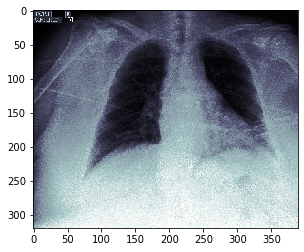

In [4]:
# Function for editing the image file paths
def edit_urls(url):
    pieces = url.split("/")
    newurl = ""
    
    #removing the previous path "CheXpert-v1.0-small" and including PATH
    for i, piece in enumerate(pieces):
        if i > 0:
            newurl += "/" + piece
        elif i == 0:
            newurl += PATH
    
    return newurl

#testing
tester_url = edit_urls(df.iloc[0]["Path"])
print(tester_url)

xray = Image.open(tester_url)
plt.imshow(xray, cmap = "bone")
plt.show()

In [5]:
remove_NaN_df = df.fillna(value = 0)
remove_NaN_df["Path"] = remove_NaN_df["Path"].apply(edit_urls)

remove_NaN_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0
2,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
U_Ones_df = remove_NaN_df.replace(-1, 1)
U_Zeros_df = remove_NaN_df.replace(-1, 0)

U_Ones_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,87,Frontal,AP,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
U_Ones_PA_df_temp = U_Ones_df[(U_Ones_df["Frontal/Lateral"] == "Frontal") & (U_Ones_df["AP/PA"] == "PA")]
U_Ones_AP_df_temp = U_Ones_df[(U_Ones_df["Frontal/Lateral"] == "Frontal") & (U_Ones_df["AP/PA"] == "AP")]
U_Ones_lateral_df_temp = U_Ones_df[U_Ones_df["Frontal/Lateral"] == "Lateral"]

U_Ones_PA_df = U_Ones_PA_df_temp.iloc[:, [0,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
U_Ones_AP_df = U_Ones_AP_df_temp.iloc[:, [0,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
U_Ones_lateral_df = U_Ones_lateral_df_temp.iloc[:, [0,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

U_Ones_PA_df.head()

,Path,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
5,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create a list of the various pathologies (targets). This will come in handy later. 
pathologies = [col for col in U_Ones_PA_df.iloc[:, 1:].columns]
print(pathologies)

['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']


In [9]:
print(len(U_Ones_PA_df))
print(len(U_Ones_AP_df))
print(len(U_Ones_lateral_df))

29420
161590
32387


In [10]:
U_Ones_PA_df.to_csv("C:/Users/Pedro/Desktop/Dataframe.csv")